In [176]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [177]:
import warnings
warnings.filterwarnings('ignore')

In [178]:
file_path = "party 2.txt"

In [179]:
with open(file_path, "r", encoding="utf-8") as file:
    speech_text = file.read()

In [180]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [181]:
#nltk.download('punkt')
#nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [182]:
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [183]:
speech_text_cleaned = re.sub(r'[^\w\s]', '', speech_text)
speech_text_cleaned = speech_text_cleaned.lower()
words = word_tokenize(speech_text_cleaned)
stop_words = set(stopwords.words("english"))
words_filtered = [word for word in words if word not in stop_words]

In [184]:
words_filtered

['joking',
 'parliament',
 'manipur',
 'fire',
 'rahul',
 'gandhi',
 'slams',
 'pm',
 'modi',
 'prime',
 'minister',
 'wants',
 'manipur',
 'burn',
 'allows',
 'burn',
 'mr',
 'gandhi',
 'alleged',
 'press',
 'conference',
 'aicc',
 'headquarters',
 'delhi',
 'asserted',
 'modi',
 'government',
 'wanted',
 'stop',
 'violence',
 'tools',
 'hands',
 'government',
 'stop',
 'immediately',
 'watched',
 'prime',
 'minister',
 'yesterday',
 'speaking',
 'two',
 'hours',
 'laughing',
 'joking',
 'raising',
 'slogans',
 'parliament',
 'prime',
 'minister',
 'would',
 'say',
 'one',
 'line',
 'bjp',
 'leaders',
 'would',
 'shout',
 'another',
 'slogan',
 'prime',
 'minister',
 'seems',
 'forgotten',
 'state',
 'manipur',
 'fire',
 'fire',
 'four',
 'months',
 'women',
 'children',
 'dying',
 'women',
 'molested',
 'raped',
 'prime',
 'minister',
 'india',
 'sitting',
 'middle',
 'parliament',
 'laughing',
 'rahul',
 'gandhi',
 'congress',
 'opposition',
 'india',
 'country',
 'state',
 'decimat

In [185]:
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]
words_lemmatized

['joking',
 'parliament',
 'manipur',
 'fire',
 'rahul',
 'gandhi',
 'slam',
 'pm',
 'modi',
 'prime',
 'minister',
 'want',
 'manipur',
 'burn',
 'allows',
 'burn',
 'mr',
 'gandhi',
 'alleged',
 'press',
 'conference',
 'aicc',
 'headquarters',
 'delhi',
 'asserted',
 'modi',
 'government',
 'wanted',
 'stop',
 'violence',
 'tool',
 'hand',
 'government',
 'stop',
 'immediately',
 'watched',
 'prime',
 'minister',
 'yesterday',
 'speaking',
 'two',
 'hour',
 'laughing',
 'joking',
 'raising',
 'slogan',
 'parliament',
 'prime',
 'minister',
 'would',
 'say',
 'one',
 'line',
 'bjp',
 'leader',
 'would',
 'shout',
 'another',
 'slogan',
 'prime',
 'minister',
 'seems',
 'forgotten',
 'state',
 'manipur',
 'fire',
 'fire',
 'four',
 'month',
 'woman',
 'child',
 'dying',
 'woman',
 'molested',
 'raped',
 'prime',
 'minister',
 'india',
 'sitting',
 'middle',
 'parliament',
 'laughing',
 'rahul',
 'gandhi',
 'congress',
 'opposition',
 'india',
 'country',
 'state',
 'decimated',
 'exis

In [186]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)["compound"] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)

In [187]:
print('The average sentiment is:', average_sentiment)

The average sentiment is: -0.02273167259786477


In [188]:
positive_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] >= -0.1 and sentiment_scores[i] <= 0.1]

In [189]:
print('The positive words are:', positive_words[:10])

The positive words are: ['joking', 'hands', 'laughing', 'joking', 'laughing', 'peacefully', 'harmoniously', 'affection', 'hands', 'faith']


In [190]:
print('The negative words are:', negative_words[:10])

The negative words are: ['fire', 'slams', 'stop', 'violence', 'stop', 'forgotten', 'fire', 'fire', 'molested', 'raped']


In [191]:
print('The neutral words are:', neutral_words[:10])

The neutral words are: ['parliament', 'manipur', 'rahul', 'gandhi', 'pm', 'modi', 'prime', 'minister', 'wants', 'manipur']


In [192]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)

In [193]:
print('The positive words frequency is:', word_freq_positive)

The positive words frequency is: <FreqDist with 9 samples and 12 outcomes>


In [194]:
print('The negative words frequency is:', word_freq_negative)

The negative words frequency is: <FreqDist with 17 samples and 28 outcomes>


In [195]:
print('The neutral words frequency is:', word_freq_neutral)

The neutral words frequency is: <FreqDist with 125 samples and 241 outcomes>


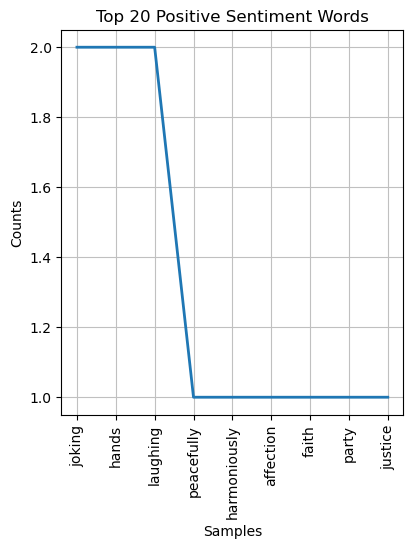

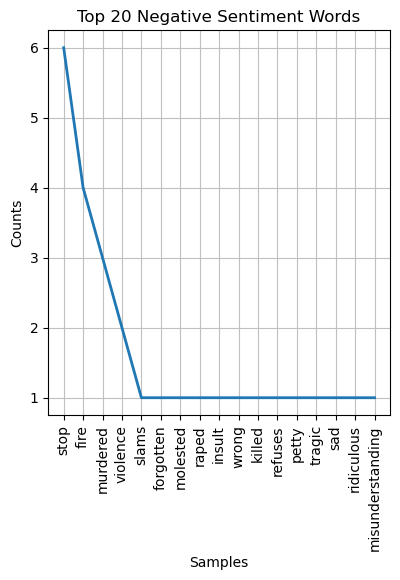

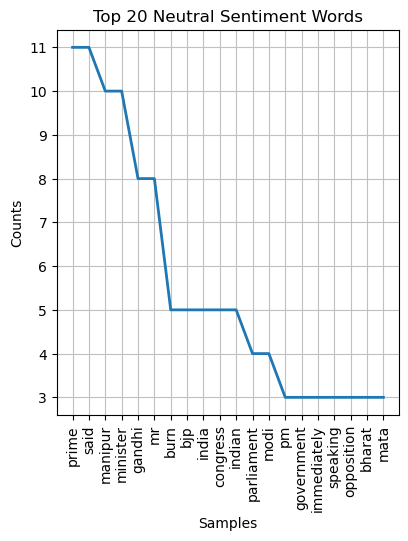

<Figure size 640x480 with 0 Axes>

In [196]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
word_freq_positive.plot(20, title="Top 20 Positive Sentiment Words")

plt.figure(figsize=(15, 5))
plt.subplot(132)
word_freq_negative.plot(20, title="Top 20 Negative Sentiment Words")

plt.figure(figsize=(15, 5))
plt.subplot(133)
word_freq_neutral.plot(20, title="Top 20 Neutral Sentiment Words")

plt.tight_layout()
plt.show()

In [197]:
df_positive = pd.DataFrame(word_freq_positive.most_common(20), columns=['Word', 'Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20), columns=['Word', 'Frequency'])
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20), columns=['Word', 'Frequency'])

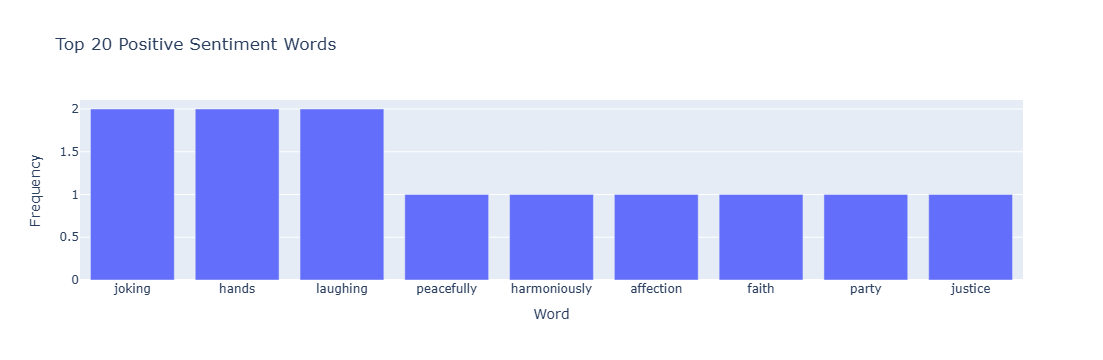

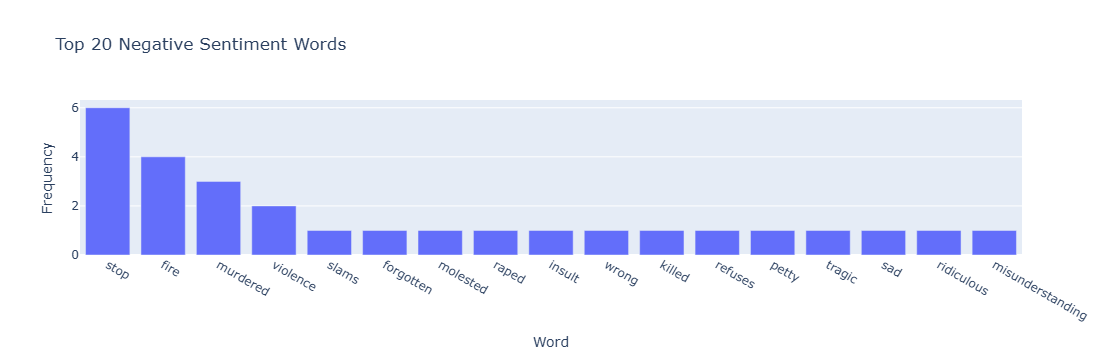

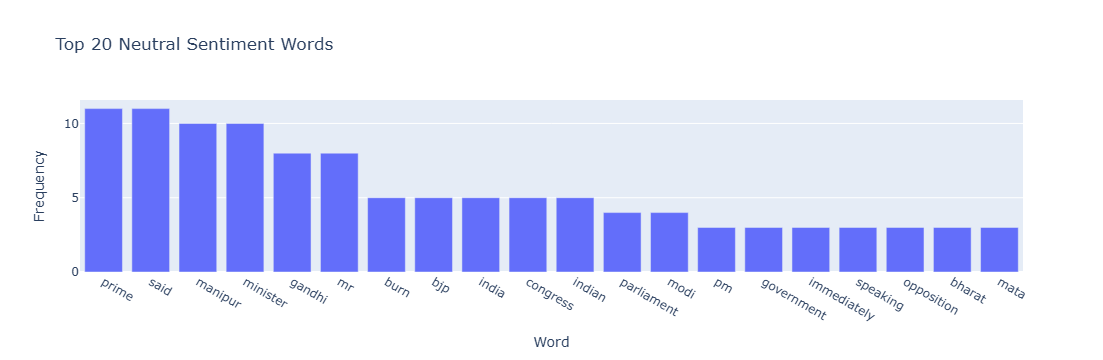

In [198]:
fig_positive = px.bar(df_positive, x='Word', y='Frequency', title="Top 20 Positive Sentiment Words")
fig_negative = px.bar(df_negative, x='Word', y='Frequency', title="Top 20 Negative Sentiment Words")
fig_neutral = px.bar(df_neutral, x='Word', y='Frequency', title="Top 20 Neutral Sentiment Words")

fig_positive.show()
fig_negative.show()
fig_neutral.show()

In [199]:
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_positive)
wordcloud_negative = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_negative)
wordcloud_neutral = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_neutral)

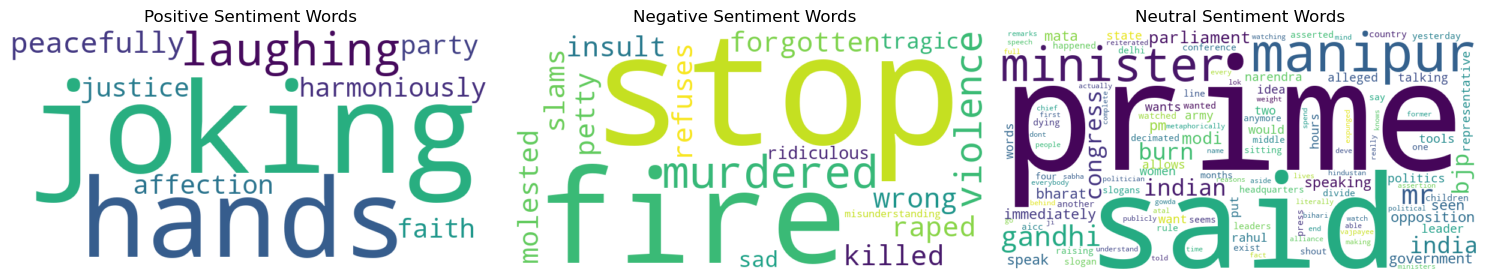

In [200]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Words")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Words")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral Sentiment Words")

plt.tight_layout()
plt.show()

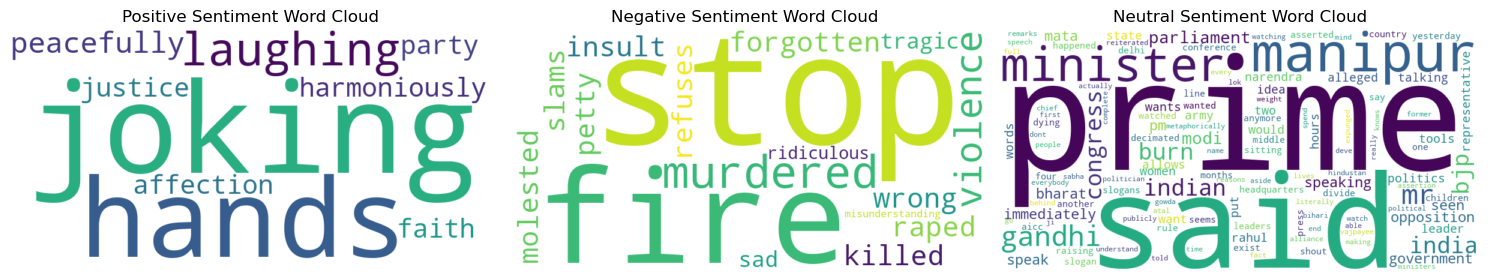

In [201]:
plt.figure(figsize=(15, 10))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Sentiment Word Cloud")
plt.axis("off")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Sentiment Word Cloud")
plt.axis("off")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.title("Neutral Sentiment Word Cloud")
plt.axis("off")

plt.tight_layout()
plt.show()

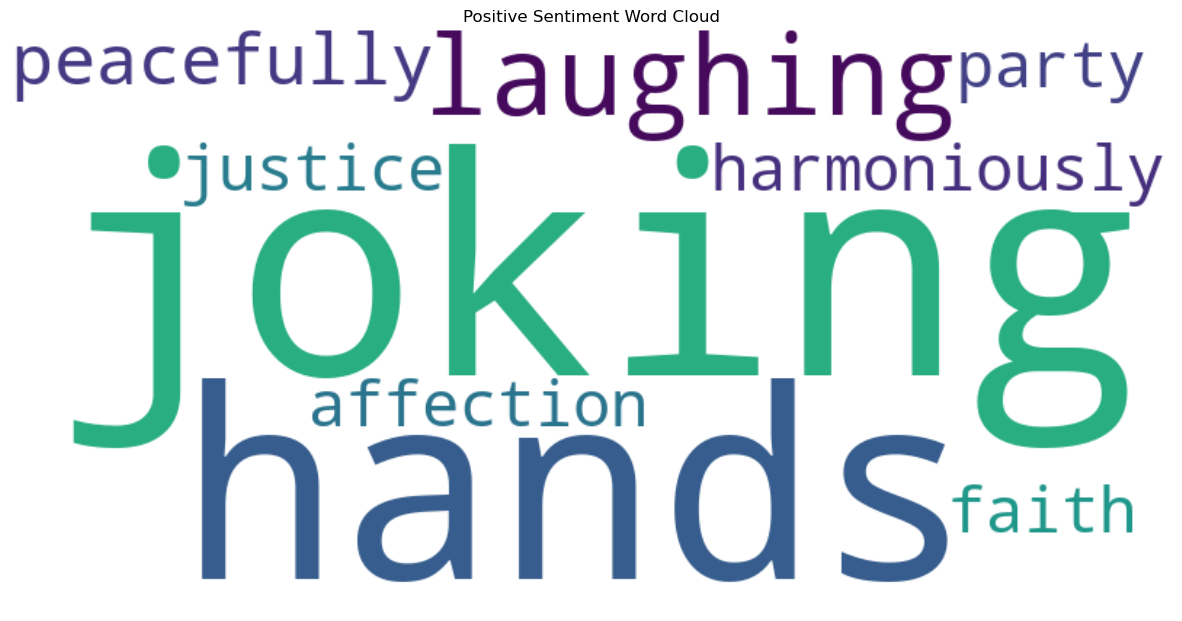

In [202]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Sentiment Word Cloud")
plt.axis("off")
plt.show()

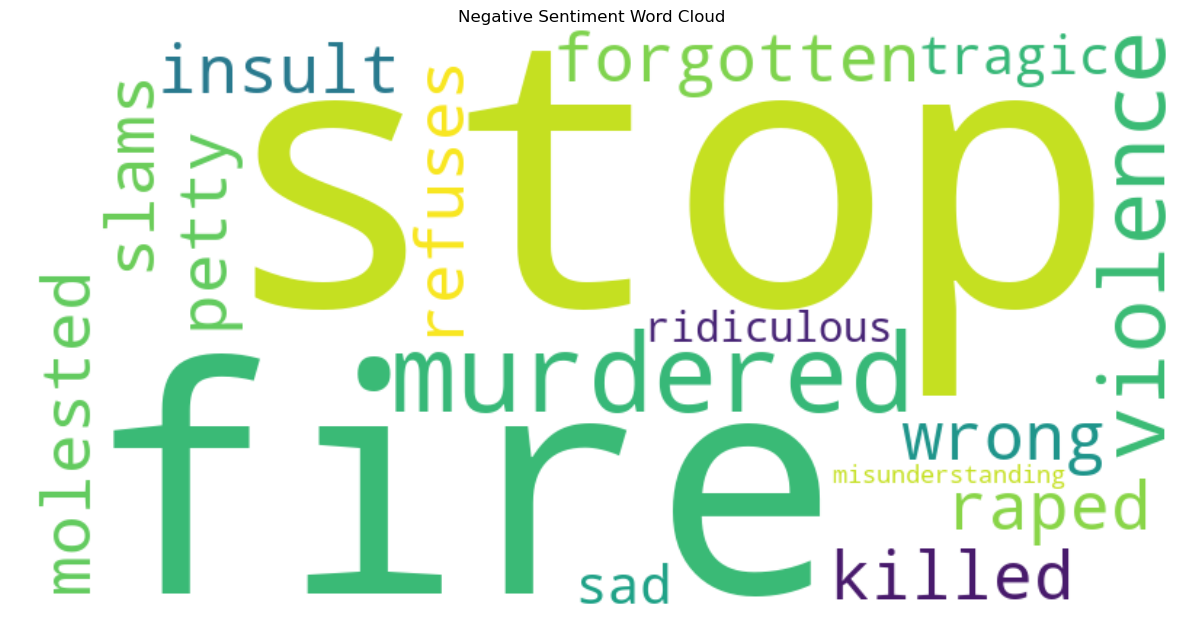

In [203]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Sentiment Word Cloud")
plt.axis("off")
plt.show()

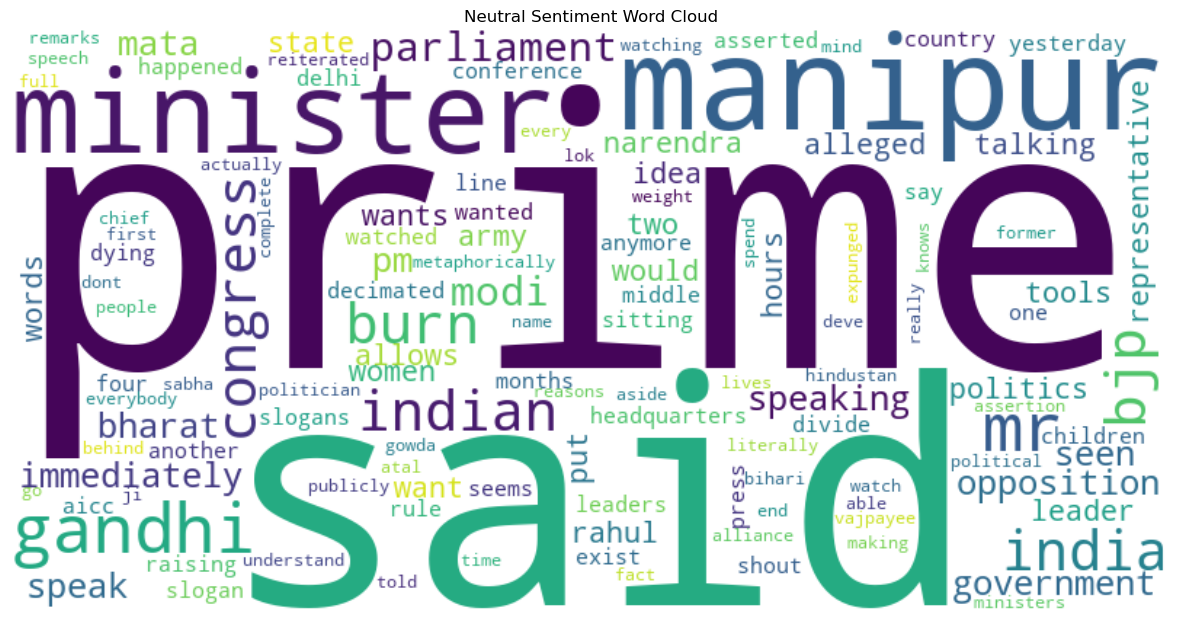

In [204]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.title("Neutral Sentiment Word Cloud")
plt.axis("off")
plt.show()

In [205]:
word_freq = nltk.FreqDist(words_lemmatized)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

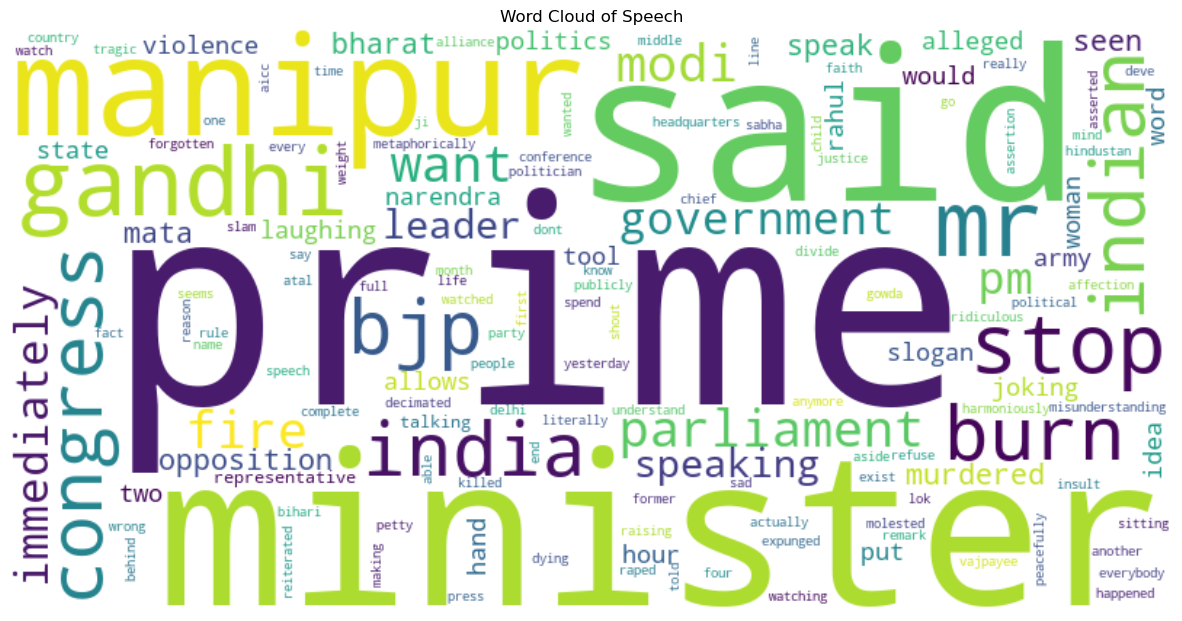

In [206]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Speech")
plt.show()

In [207]:
total_words = len(words_filtered)
positive_percentage = (len(positive_words) / total_words) * 100
negative_percentage = (len(negative_words) / total_words) * 100
neutral_percentage = (len(neutral_words) / total_words) * 100

print("Positive Sentiment Percentage:", positive_percentage)
print("Negative Sentiment Percentage:", negative_percentage)
print("Neutral Sentiment Percentage:", neutral_percentage)

Positive Sentiment Percentage: 4.270462633451958
Negative Sentiment Percentage: 9.9644128113879
Neutral Sentiment Percentage: 85.76512455516014


In [208]:
data = {'Sentiment': ['Positive', 'Negative', 'Neutral'],
        'Percentage': [positive_percentage, negative_percentage, neutral_percentage]}

In [209]:
df_percentages = pd.DataFrame(data)

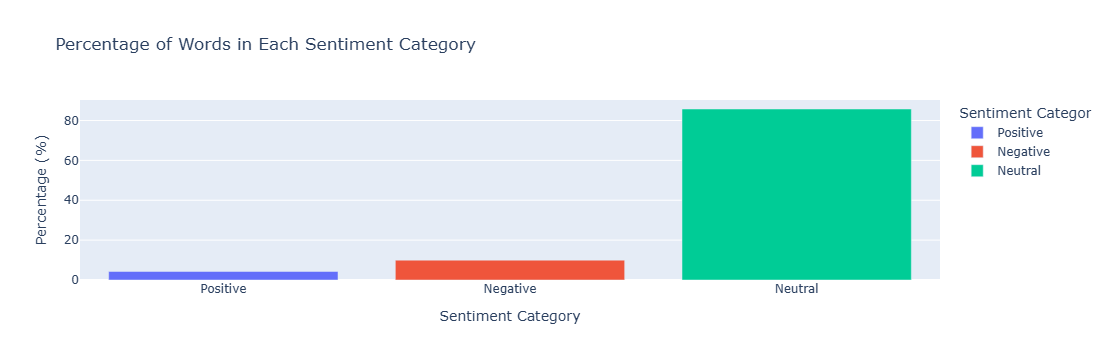

In [210]:
fig = px.bar(df_percentages, x='Sentiment', y='Percentage', color='Sentiment',
             labels={'Sentiment': 'Sentiment Category', 'Percentage': 'Percentage (%)'},
             title='Percentage of Words in Each Sentiment Category')
fig.show()